In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the data
LoanData = pd.read_csv('data/01Exercise1.csv')
LoanData.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [3]:
LoanData.shape

(614, 6)

In [4]:
LoanPrep = LoanData.copy()
LoanPrep.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [5]:
#Identify the missing values 
LoanPrep.isnull().sum(axis=0)

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [6]:
LoanPrep = LoanPrep.dropna()
LoanPrep.shape

(529, 6)

In [7]:
LoanPrep.isnull().sum(axis=0)

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [8]:
#Drop clomun gender
LoanPrep.drop(['gender'],axis=1,inplace=True)
LoanPrep.head()

,married,ch,income,loanamt,status
1,Yes,1.0,4583,128.0,N
2,Yes,1.0,3000,66.0,Y
3,Yes,1.0,2583,120.0,Y
4,No,1.0,6000,141.0,Y
5,Yes,1.0,5417,267.0,Y


In [9]:
#Create dummy variables
LoanPrep.dtypes

married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [10]:
LoanPrep = pd.get_dummies(LoanPrep,drop_first=True)

In [11]:
LoanPrep.head()

,ch,income,loanamt,married_Yes,status_Y
1,1.0,4583,128.0,True,False
2,1.0,3000,66.0,True,True
3,1.0,2583,120.0,True,True
4,1.0,6000,141.0,False,True
5,1.0,5417,267.0,True,True


In [12]:
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()

In [13]:
LoanPrep['income']=scalar_.fit_transform(LoanPrep[['income']])
LoanPrep['loanamt']=scalar_.fit_transform(LoanPrep[['loanamt']])
LoanPrep.head()

,ch,income,loanamt,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,True,False
2,1.0,-0.392077,-0.971015,True,True
3,1.0,-0.461621,-0.294478,True,True
4,1.0,0.108246,-0.031380,False,True
5,1.0,0.011017,1.547205,True,True


In [14]:
#split data to train and test
y = LoanPrep['status_Y']
X = LoanPrep.drop(['status_Y'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234,stratify=y)
print(f"X_train:{X_train.shape} X_test:{X_test.shape}")

X_train:(354, 4) X_test:(175, 4)


In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC()

In [19]:
svc.fit(X_train,y_train)

SVC()

In [21]:
y_predict = svc.predict(X_test)
y_predict[:5]

array([ True,  True,  True,  True, False])

In [22]:
#build the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 29,  25],
       [  1, 120]], dtype=int64)

In [24]:
svc.score(X_test,y_test)

0.8514285714285714

In [27]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

In [28]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

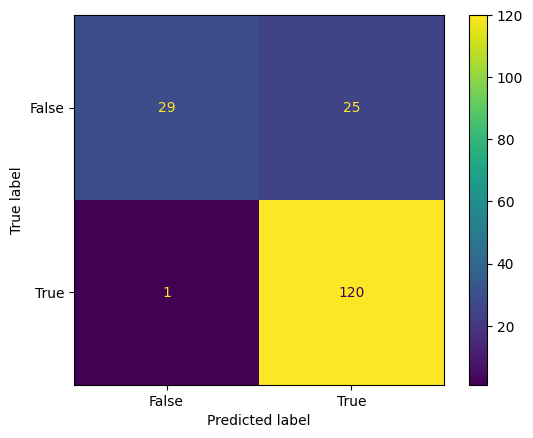

In [29]:
cm_display.plot()
plt.show()